# Vergelijking lateralen

Met deze notebook vergelijken we de lateralen uit de resultaten van het model geleverd in 2021 (`origineel`) met de resultaten van hetzelfde model in dit project (`huidig`)

# 1. Voorbereiding 

We lezen alle modules en paden in

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# De locatie waar de informatieproducten worden geplaastst.
export_path = Path('../results')

# 2. Inlezen

We lezen de csvs met laterale debieten in

## 2.1. Inlezen

Hieronder lezen we de CSV's in

In [2]:
# inlezen csv met het origineel uit 2021
df_origineel = pd.read_csv(
    export_path.joinpath(r"geleverd_Ruud\Maatgevend\laterale_flux\Laterals_Huidig250.csv"),
    index_col=0,
)
df_origineel.index = pd.to_datetime(df_origineel.index) # Index naar datetime
df_origineel.drop(labels=["0"], axis=1, inplace=True) # de eerste kolom is leeg, dus gooien we weg

# inlezen csv met nieuwe run en hetzelde model
df_huidig = pd.read_csv(
    export_path.joinpath(r"Maatgevend\laterals_Huidig250.csv"),
    index_col=0,
)
df_huidig.index = pd.to_datetime(df_huidig.index) # Index naar datetime
df_huidig.drop(labels=['0'], axis=1, inplace=True) # de eerste kolom is leeg, dus gooien we weg

## 2.2. Filteren lateral 1727

Op de Utrechtse heuvelrug zit een lateraal die 18.25 m3/s onttrekt uit het oppervlaktewatersysteem. In verhouding, op het de hele oppervlakte van HDSR (+/- 83000 ha) ongeveer 2mm/dag (ongeveer 700 mm/jaar).

<AxesSubplot:>

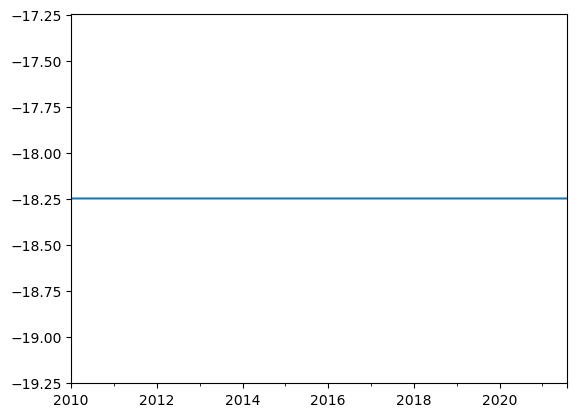

In [3]:
df_origineel["1727"].plot()

In [4]:
df_origineel.drop(labels=["1727"], axis=1, inplace=True)
df_huidig.drop(labels=["1727"], axis=1, inplace=True)

# 3. Sommeren naar HDSR

We sommeren de debieten naar het hele beheergebied van HDSR

In [5]:
series_origineel = df_origineel.sum(axis=1)
series_huidig = df_huidig.sum(axis=1)

# 3. Plotten

We maken plotjes om de verschillen inzichtelijk te maken

In [6]:
def grafiek(series_origineel, series_huidig, y_label, figsize=(12, 6)):
    
    
    years = pd.date_range(start="2010-07-01", end="2021-07-01", freq="AS-JUL")
    plt.figure(figsize=figsize) #setten van de grootte van de figuur

    # Plotten van de data
    plt.plot(series_origineel, label="origineel")
    plt.plot(series_huidig, label="huidig")

    # Grafiek opmaken
    plt.xlabel("Tijd")
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.xlim("2010-07-01", "2021-06-30")
    plt.xticks(years, years.strftime('%Y-%m-%d'), rotation=90)
    
    # Tonen
    plt.show()

## 3.2 Tijdseries

We tonen de gesommeerde tijdreeksen.

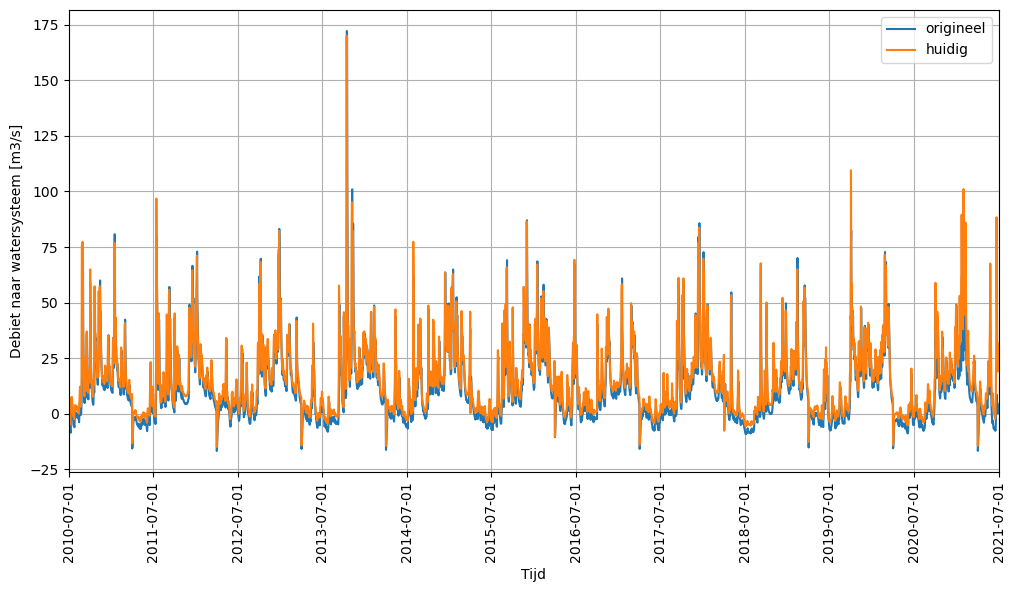

In [7]:
grafiek(
    series_origineel, series_huidig,
    "Debiet naar watersysteem [m3/s]"
)

## 3.2 Tijdseries cumulatief over tijd

We transformeren de data naar mm/dag en berekenen de cumulatieve onttrekking uit het watersysteem.

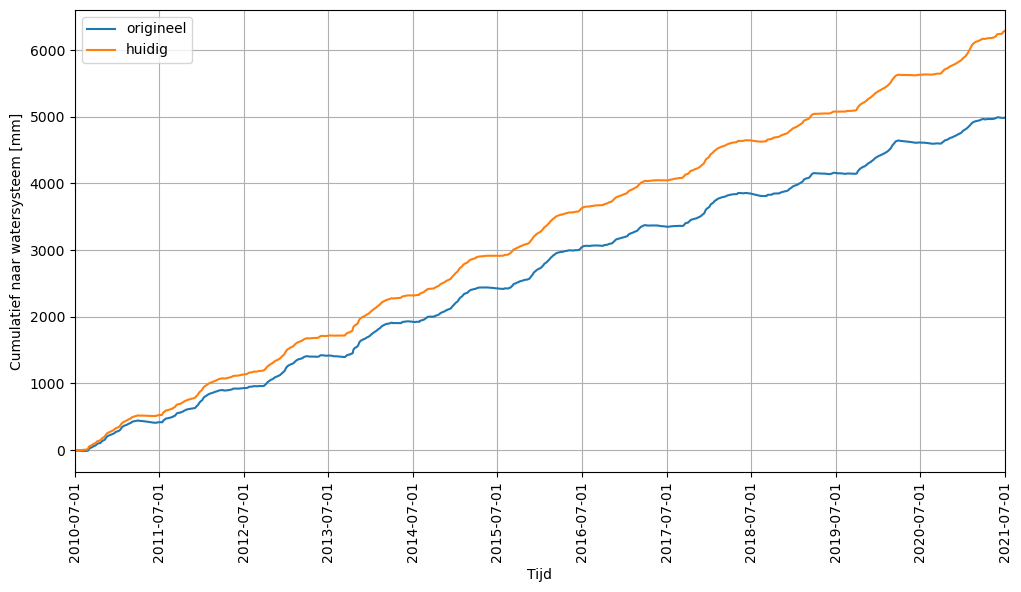

In [8]:
hdsr_area_m2 = 830210666 # berekend uit waterschapsgrenzen shapefile (in rijksdriehoekstelsel)

# van seconden naar (x 86400) dag, van m3 naar m (/ oppervlak HDSR) en van m naar mm (x 1000)
series_origineel_mm = ((series_origineel * 86400 * 1000) / hdsr_area_m2).loc['2010-07-01':'2021-06-30']
series_huidig_mm = ((series_huidig * 86400 * 1000) / hdsr_area_m2).loc['2010-07-01':'2021-06-30']

# plotten van de grafieken
grafiek(
    series_origineel_mm.loc['2010-07-01':'2021-07-01'].cumsum(),
    series_huidig_mm.loc['2010-07-01':'2021-07-01'].cumsum(),
    "Cumulatief naar watersysteem [mm]"
)

## 3.2 Tijdseries cumulatief over tijd, per jaar

We transformeren de data naar mm/dag en berekenen de cumulatieve onttrekking uit het watersysteem per jaar, waarbij we starten op 01/07 van elk jaar.

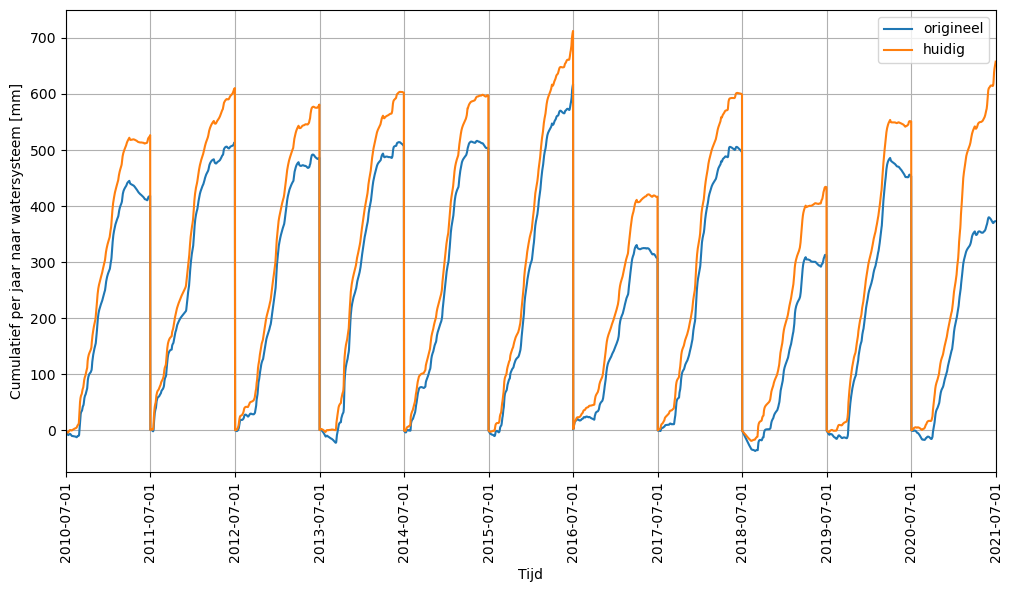

In [9]:
def custom_year_grouping(series):
    year = series.index.year
    month = series.index.month
    custom_year = year + (month >= 7)
    return custom_year

grafiek(
    series_origineel_mm.groupby(custom_year_grouping(series_origineel_mm)).apply(lambda x: x.cumsum()),
    series_huidig_mm.groupby(custom_year_grouping(series_huidig_mm)).apply(lambda x: x.cumsum()),
    "Cumulatief per jaar naar watersysteem [mm]"
)  